# Homework 4:  Linear models

This homework assignment is designed to give you practice with linear models and the bias-variance tradeoff. 

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 


This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`), Flanker Task performance (`Flanker_Unadj`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [1]:
library(ggthemes)
library(tidyverse)
library(here)
library(skimr)
library(janitor)
library(psych)
library(reshape2)
library(dplyr)

Warning message:
“package ‘ggthemes’ was built under R version 3.6.2”
Warning message:
“package ‘tidyverse’ was built under R version 3.6.2”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 3.6.2”
Warning message:
“package ‘tibble’ was built under R version 3.6.2”
Warning message:
“package ‘tidyr’ was built under R version 3.6.2”
Warning message:
“package ‘readr’ was built under R version 3.6.2”
Warning message:
“package ‘purrr’ was built under R version 3.6.2”
Warning message:
“package ‘dplyr’ was built under R version 3.6.2”
Warning message:
“package ‘forcats’ was built under R version 3.6.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [26]:
getwd()
setwd("/Users/josephluetkehans/Documents/GitHub/Luetkehans_DSPN_S22/data")
data <- read.csv("unrestricted_trimmed_1_7_2020_10_50_44 copy.csv")

d1 <- data %>%
subset(select = c(Subject, Gender, Flanker_Unadj, FS_Tot_WM_Vol, FS_Total_GM_Vol)) %>%
na.omit() %>%
clean_names()

head(d1)

sum(d1$fs_tot_wm_vol == "NA")
sum(d1$fs_total_gm_vol == "NA")
#No NA values included



[1] "/Users/josephluetkehans/Documents/GitHub/Luetkehans_DSPN_S22/data"

,subject,gender,flanker_unadj,fs_tot_wm_vol,fs_total_gm_vol
,<int>,<fct>,<dbl>,<int>,<int>
2,100206,M,130.42,543134,807245
3,100307,F,112.56,407292,664124
4,100408,M,121.18,500417,726206
5,100610,M,126.53,512946,762308
6,101006,F,101.85,429449,579632
7,101107,M,107.04,416995,665024


[1] 0

[1] 0

---
## 2. Initial data visualization (2 point)

Use the `pairs` function to look at all the pairwise scatterplots of the variables in `d1`. Describe which variables seem positively correlated, negatively correlated, or not correlated at all.

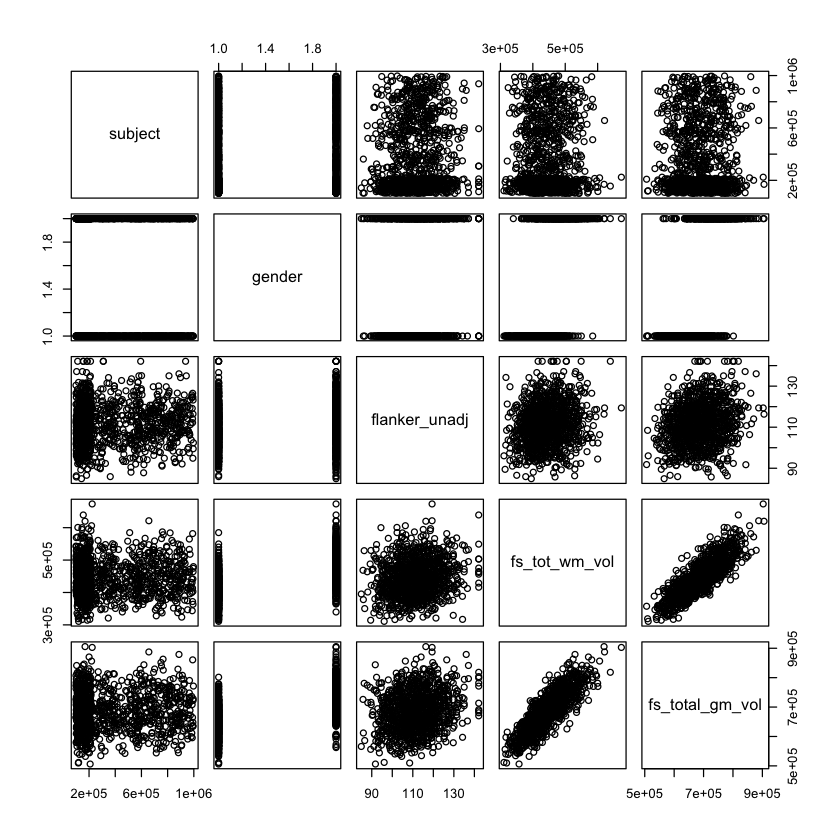

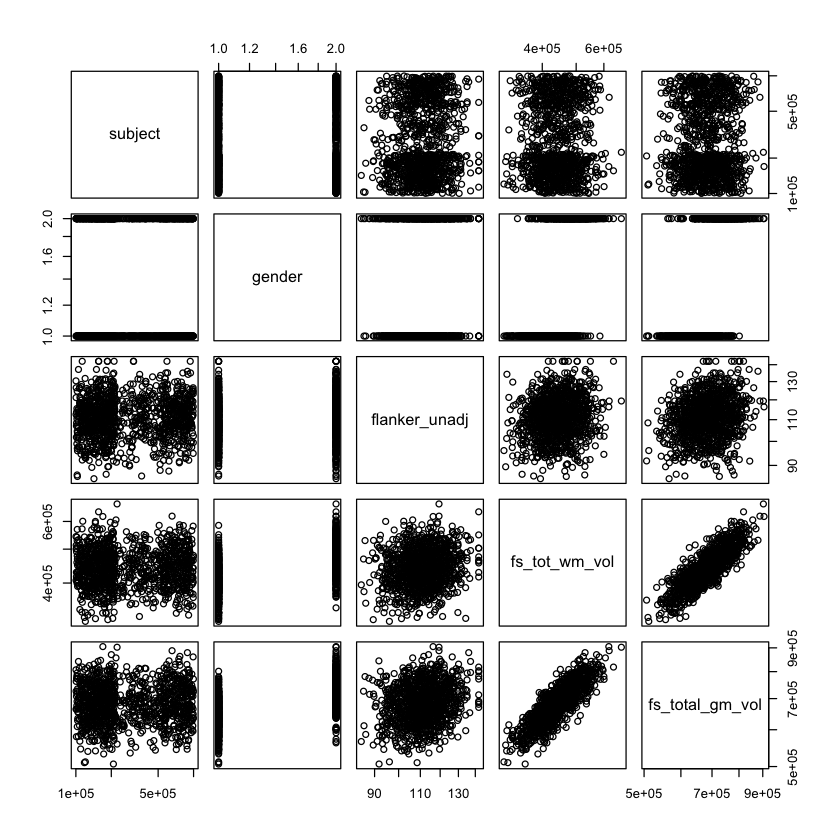

In [27]:
pairs(d1)

pairs(d1, log = 'xy')


> It appears that total white matter volume (FS_Tot_WM_Vol) is positively correlated with total grey matter volume (FS_Total_GM_Vol).  Some of these scatterplots looked like they may benefit from a log tranformation, so I applied this change to see whether there are any other correlations we can infer.  However, this did not help.  There appears to be little/no correlation between flanker task performance and white or grey matter volume.  

> There appears to be a slight gender difference in total white and grey matter volume.

---
## 3. Linear regression (4 points)

Use the `lm` (linear model) function to determine the association between Flanker Task performance and total grey matter volume from the `d1` data frame.

$$
Y_{flanker} = \beta_0 + \beta_1 X_{GM volume}
$$

Show the results using the `summary` function, and report the mean coefficient values for $beta_0$ \& $\beta_1$ (`coef` function) and their 95\% confidence intervals (`confint` function). Is grey matter volume significantly associated with Flanker Task performance?

In [38]:
d1_lm = lm(flanker_unadj~fs_total_gm_vol, data = d1)

summary(d1_lm)
coef(d1_lm)
confint(d1_lm, level=0.90)




Call:
lm(formula = flanker_unadj ~ fs_total_gm_vol, data = d1)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.2280  -6.5969  -0.0119   6.5497  31.0108 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9.026e+01  3.041e+00  29.677  < 2e-16 ***
fs_total_gm_vol 3.110e-05  4.412e-06   7.048 3.18e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.864 on 1111 degrees of freedom
Multiple R-squared:  0.0428,	Adjusted R-squared:  0.04194 
F-statistic: 49.68 on 1 and 1111 DF,  p-value: 3.177e-12


(Intercept) fs_total_gm_vol 
   9.025646e+01    3.109965e-05

,5 %,95 %
(Intercept),8.524983e+01,9.526309e+01
fs_total_gm_vol,2.383576e-05,3.836355e-05


> Yes, grey matter volume is significantly (and positively) associated with flanker task performance.  Based on the scatterplot alone, I would not have guessed that this was a significant correlation.

---
## 4. Plotting (2 points)

Use `ggplot` to plot the `FS_Total_GM_Vol` variable (x axis) against the `Flanker_Unadj` variable (y axis), as well as the regression line with confidence intervals on the regression line. Qualitatively describe what you see. 

`geom_smooth()` using formula 'y ~ x'



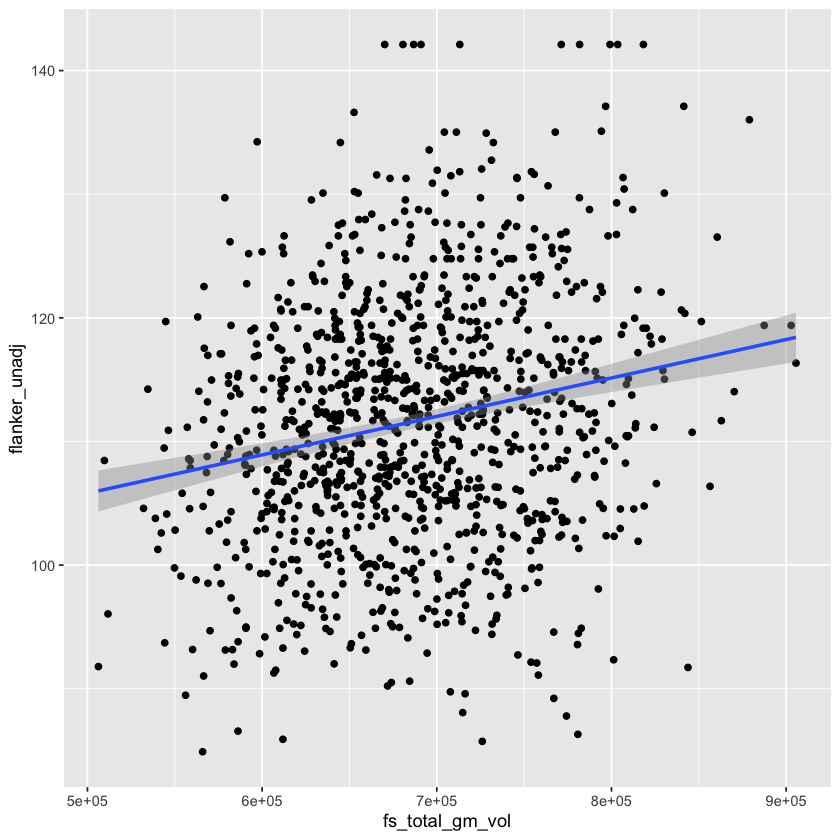

In [48]:


d1 %>% ggplot(aes(x = fs_total_gm_vol, y = flanker_unadj)) +
geom_point() +
geom_smooth(method = 'lm') #confidence interval is 0.95 by default



> I see a general positive trend between flanker task performance and total grey matter volume, with a linear regression model to match.  Our model captures little of the variance in this data, and would likely be a poor predictor of flanker task performance based on some individual's grey matter volume.

---

## 5. Reflection (1 point)

What do you conclude based on the analyses above?

> As I stated in the question above, I can conclude that flanker task performance is positively correlated with grey matter volume.

> Based on the analyses above, I can also conclude several general things about using linear models to find a relationship between some variables in a dataset.  I struggled initially to see that there might be a positive correlation between flanker task performance and grey/white matter volume.  This is why the linear model was so helpful: not only did it help me see this correlation when plotted, but it also assured me that this correlation was not due to chance.  Using this dataset in our analyses also highlights some of the limitations of linear models that we've discussed recently.  For example, while this linear model does capture some of the variance in our data, there is even more variance that that the model does not capture, which I believe would make it a poor tool for directly prediction flanker task performance based on grey matter volume.  However, this model was very helpful in discovering that there was indeed a statistically significant relationship between these variables.

**DUE:** 5pm EST, March 4, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*